
# Hollow Core in infinite glass 

N0 Configuration in Bird

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton


importing NGSolve-6.2.2203-56-g47f483033


In [2]:
n_air = 1.00027717
n_glass = 1.4388164768221814

In [3]:
A = BraggExact(ts=[15e-6,5e-6], mats=['air', 'glass'], 
               ns=[lambda x:1.44, lambda x:1.43],
              maxhs=[.1,.1], wl=1.8e-6, scale=1.5e-5)


In [4]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [21]:
k_low = A.k0 * A.ns[1] * A.scale
k_high = A.k0 * A.ns[0] * A.scale

outer = 'h2'
Ktype = 'i_gamma'
nu = 1

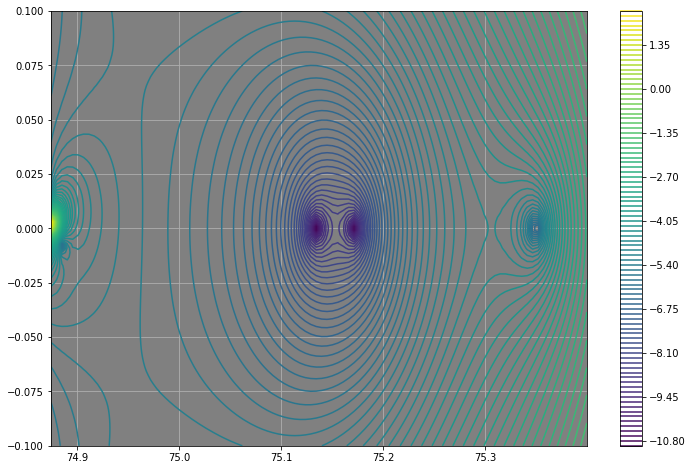

In [22]:
plotlogf(A.determinant, k_low-.0001, k_high+.001, -.1, .1, nu, outer, Ktype,
         iref=100, rref=100, levels=100)

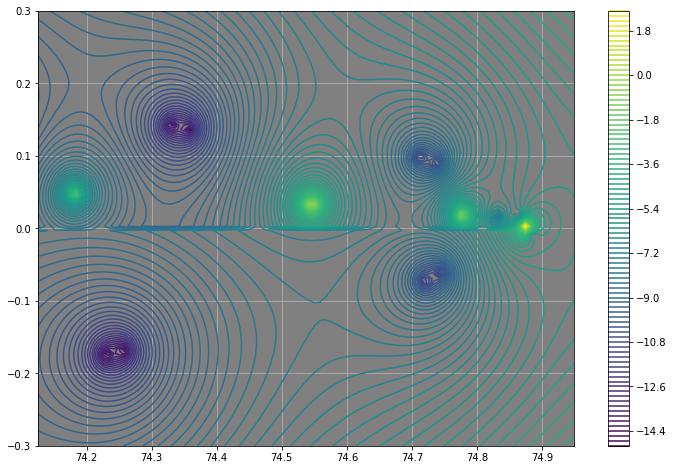

In [23]:
%matplotlib inline
plotlogf(A.determinant, .99*k_low, 1.001*k_low, -.3,.3, nu, outer,Ktype,
         iref=100, rref=100, levels=100)

In [25]:
# guess = np.array(.999*k_low - .02j)
guess = np.array(k_low + .9*(k_high - k_low))

beta1 = newton(A.determinant, guess, args=(nu, outer, Ktype), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer, Ktype)))


Scaled beta:  (75.34935709407918-1.0605369503772605e-09j) . Residual of determinant:  1.9212063175535323e-15


Coefficient Check

In [64]:
# Nu = 2
# H1 Kappa
74.49774309540237+0.12281619823970129j, 74.55211286988457+0.10651592893206584j

# H2 Kappa
74.49774309540237-0.12281619823970122j, 74.55211286988457-0.10651592893206584j

# H1 i gamma
# None except guided

# H2 i gamma
# Above real line:
74.53921292515635+0.14179501057290217j, 74.59755188342689+0.12761093314995384j
# Below real line:
74.49774309540237-0.12281619823970122j, 74.55211286988457-0.10651592893206584j

((74.49774309540237-0.12281619823970122j),
 (74.55211286988457-0.10651592893206584j))

## Above real line were new modes... below was just the same (leaky) modes.

# Bragg Exact Fields

In [26]:
Fs = A.all_fields(beta1, nu=nu, outer=outer, Ktype=Ktype)

In [29]:
fs = A.fields_matplot(beta1, nu=nu, outer=outer, Ktype=Ktype)

(<Figure size 1152x1152 with 1 Axes>, <AxesSubplot: >)

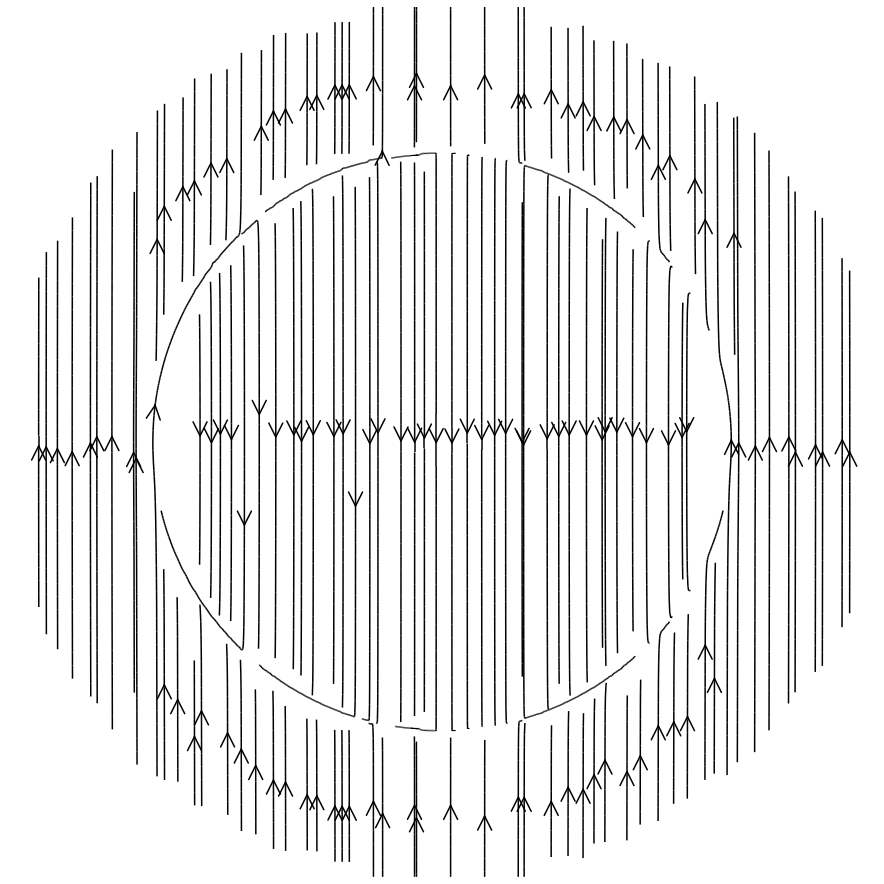

In [30]:
A.plot2D_streamlines(fs['Ex'], fs['Ey'])

In [27]:
Draw(Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [74]:
Draw(Fs['Hz'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [28]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':150})


WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [29]:
Draw(Fs['Ephi'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [31]:
Draw(Fs['Hphi'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene